### Investigate if participants allocate more cubes for:
- NVC or non-NVC robot?
- robot B or A?

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['fast'])
plt.style.use(['seaborn-poster'])
print(plt.style.available)

DATA_FOLDER = "/data/cubes/"
DATA_PATH = os.path.abspath(os.getcwd()) + DATA_FOLDER

['seaborn', 'seaborn-colorblind', 'seaborn-muted', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-paper', 'classic', 'fast', 'seaborn-white', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn-darkgrid', 'seaborn-dark-palette', 'dark_background', 'seaborn-ticks', 'seaborn-dark', '_classic_test', 'grayscale', 'bmh', 'seaborn-notebook', 'seaborn-poster', 'seaborn-talk', 'seaborn-bright', 'ggplot']


In [2]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []

for filename in os.listdir(DATA_PATH):
    if filename.endswith(".csv"): 
        participant_id = int(re.search(r'\d+', filename).group())
        temp = pd.read_csv(DATA_PATH + filename)
        temp["scene"] = temp["scene"].str[-1:]
        temp["scene"] = temp["scene"].astype('int')
        temp["participant"] = participant_id
        nvc = "B"
        if int(participant_id) % 2 == 0:
            nvc = "A"
    
        temp["NVC"] = nvc
        dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
raw_data.head()

,scene,robot_a,robot_b,participant,NVC
0,0,2,2,3,B
1,1,1,2,3,B
2,2,3,3,3,B
3,3,4,3,3,B
4,4,4,3,3,B


In [4]:
# Only from scene 2 to 4
filtered_data = raw_data[raw_data["scene"] > 0]
filtered_data.head()

,scene,robot_a,robot_b,participant,NVC
1,1,1,2,3,B
2,2,3,3,3,B
3,3,4,3,3,B
4,4,4,3,3,B
6,1,3,2,13,B


In [5]:
# Find the total amount of cubes that participants allocated
cubes_per_participant = filtered_data.groupby("participant").sum()
cubes_per_participant = cubes_per_participant.drop(columns=['scene'])
cubes_per_participant['total_cubes'] = cubes_per_participant['robot_a'] + cubes_per_participant['robot_b'] 
cubes_per_participant

,robot_a,robot_b,total_cubes
participant,,,
1,10,9,19
2,8,8,16
3,12,11,23
4,7,9,16
5,10,13,23
6,1,17,18
7,7,17,24
8,10,12,22
9,12,12,24


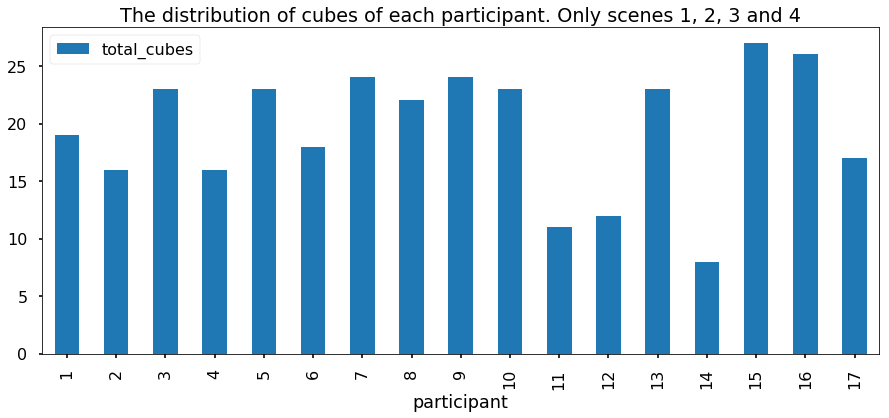

In [6]:
cubes_per_participant_plot_data = cubes_per_participant.drop(columns=['robot_a', 'robot_b'])
cubes_per_participant_plot_data.plot(kind = 'bar', yticks=range(0, 30, 5), figsize=(15,6), title="The distribution of cubes of each participant. Only scenes 1, 2, 3 and 4")

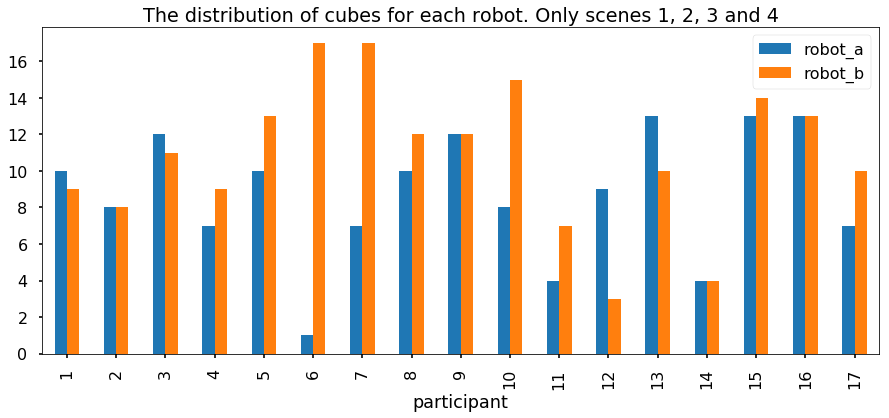

In [7]:
cubes_per_participant_plot_data = cubes_per_participant.drop(columns=['total_cubes'])
cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot. Only scenes 1, 2, 3 and 4")

### Approach 1. Calculate the significance of allocated cubes as:
- the number of allocated cubes to one robot divided by the sum of allocated cubes to both robots 

In [8]:
filtered_data.head()

,scene,robot_a,robot_b,participant,NVC
1,1,1,2,3,B
2,2,3,3,3,B
3,3,4,3,3,B
4,4,4,3,3,B
6,1,3,2,13,B


In [9]:
approach1 = filtered_data.copy()
approach1["sum_cubes_a_and_b"] = approach1["robot_a"] + approach1["robot_b"]
approach1["significance_A"] = approach1["robot_a"] / approach1["sum_cubes_a_and_b"]
approach1["significance_B"] = approach1["robot_b"] / approach1["sum_cubes_a_and_b"]
approach1.head()

,scene,robot_a,robot_b,participant,NVC,sum_cubes_a_and_b,significance_A,significance_B
1,1,1,2,3,B,3,0.333333,0.666667
2,2,3,3,3,B,6,0.500000,0.500000
3,3,4,3,3,B,7,0.571429,0.428571
4,4,4,3,3,B,7,0.571429,0.428571
6,1,3,2,13,B,5,0.600000,0.400000


In [10]:
approach1_plot_data = approach1.groupby(['scene']).mean()
approach1_plot_data = approach1_plot_data.drop(columns=['robot_a', 'robot_b', 'participant', 'sum_cubes_a_and_b'])
approach1_plot_data

,significance_A,significance_B
scene,,
1,0.536905,0.463095
2,0.415476,0.584524
3,0.488393,0.511607
4,0.392157,0.607843


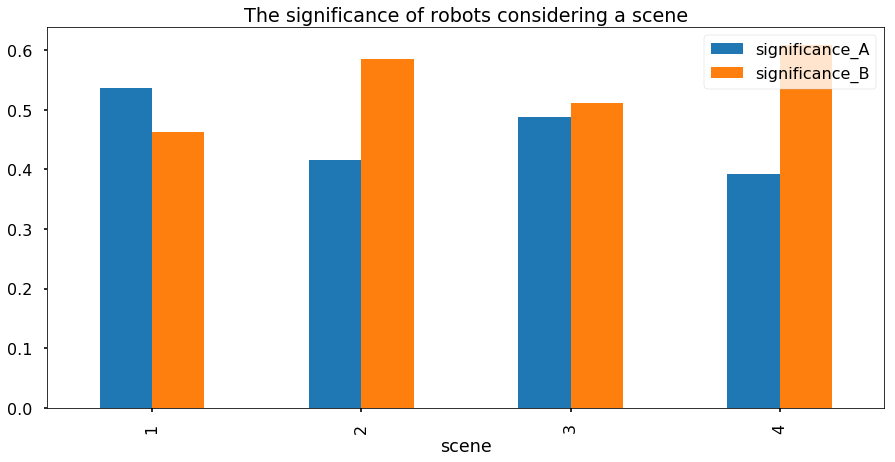

In [11]:
approach1_plot_data.plot(kind='bar', figsize=(15,7), title='The significance of robots considering a scene')

In [12]:
approach1_plot_data = approach1.groupby(['scene', 'NVC']).mean()
approach1_plot_data = approach1_plot_data.drop(columns=['robot_a', 'robot_b', 'participant', 'sum_cubes_a_and_b'])
approach1_plot_data

significance_A  significance_B
scene NVC                                
1     A          0.566667        0.433333
      B          0.520370        0.479630
2     A          0.382653        0.617347
      B          0.441005        0.558995
3     A          0.442857        0.557143
      B          0.523810        0.476190
4     A          0.386905        0.613095
      B          0.396825        0.603175

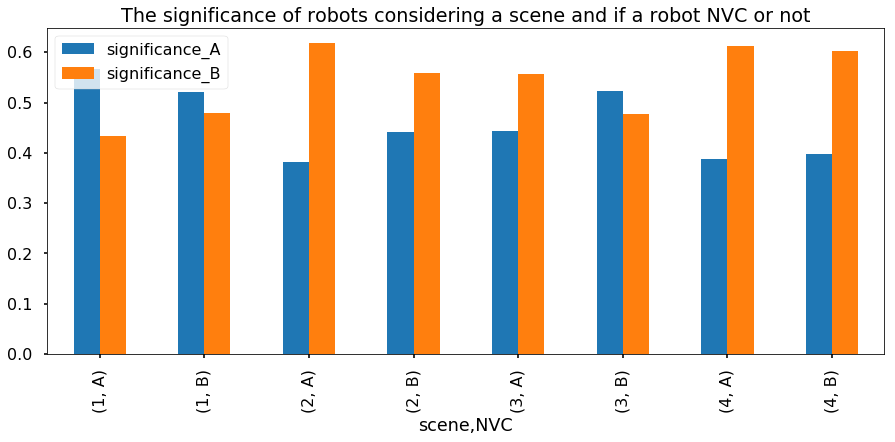

In [13]:
approach1_plot_data.plot(kind='bar', figsize=(15,6), title='The significance of robots considering a scene and if a robot NVC or not')

# Irrelevant stuff

### Approach 2. Only scene 2 data merged with total number of cubes. Extended with NVC or non-NVC. We define a significance level for allocated cubes for each participant in a scene 2 as:
- sum all allocations of cubes for each paritipant through scenes 2, 3 and 4 
- devide the allocation of cubes of each participant in a scene 2 through the calculated sum

In [14]:
scene2_data = raw_data[raw_data["scene"] == 2]
scene2_data

,scene,robot_a,robot_b,participant,NVC
2,2,3,3,3,B
7,2,0,5,13,B
12,2,1,3,5,B
17,2,3,3,16,A
22,2,2,2,2,A
27,2,2,5,15,B
32,2,3,2,1,B
37,2,2,2,14,A
42,2,1,3,6,A
47,2,2,2,4,A


In [15]:
# Only scene 2 data merged with total number of cubes
cubes_per_participant = cubes_per_participant.reset_index()
eval_data = pd.merge(scene2_data, cubes_per_participant, on='participant')
eval_data = eval_data.drop(columns=['robot_a_y', 'robot_b_y'])
eval_data = eval_data.rename(columns={"robot_a_x": "robot_a", "robot_b_x": "robot_b"})
eval_data

,scene,robot_a,robot_b,participant,NVC,total_cubes
0,2,3,3,3,B,23
1,2,0,5,13,B,23
2,2,1,3,5,B,23
3,2,3,3,16,A,26
4,2,2,2,2,A,16
5,2,2,5,15,B,27
6,2,3,2,1,B,19
7,2,2,2,14,A,8
8,2,1,3,6,A,18
9,2,2,2,4,A,16


In [16]:
eval_data['robot_a_significance'] = eval_data['robot_a'] / eval_data['total_cubes'] 
eval_data['robot_b_significance'] = eval_data['robot_b'] / eval_data['total_cubes']
eval_data['NVC_A'] = eval_data['NVC'] == "A"
eval_data['NVC_B'] = eval_data['NVC'] == "B"
eval_data

,scene,robot_a,robot_b,participant,NVC,total_cubes,robot_a_significance,robot_b_significance,NVC_A,NVC_B
0,2,3,3,3,B,23,0.130435,0.130435,False,True
1,2,0,5,13,B,23,0.000000,0.217391,False,True
2,2,1,3,5,B,23,0.043478,0.130435,False,True
3,2,3,3,16,A,26,0.115385,0.115385,True,False
4,2,2,2,2,A,16,0.125000,0.125000,True,False
5,2,2,5,15,B,27,0.074074,0.185185,False,True
6,2,3,2,1,B,19,0.157895,0.105263,False,True
7,2,2,2,14,A,8,0.250000,0.250000,True,False
8,2,1,3,6,A,18,0.055556,0.166667,True,False
9,2,2,2,4,A,16,0.125000,0.125000,True,False


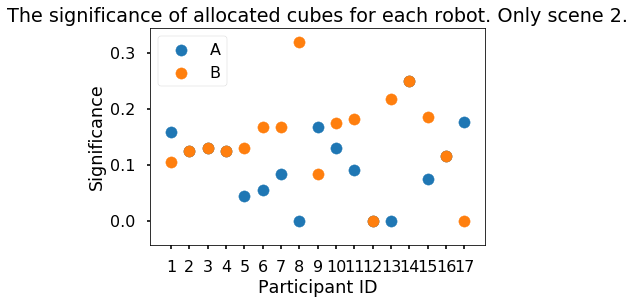

In [17]:
plt.scatter(eval_data["participant"], eval_data["robot_a_significance"], label="A")
plt.scatter(eval_data["participant"], eval_data["robot_b_significance"], label="B")
plt.title("The significance of allocated cubes for each robot. Only scene 2.")
plt.xlabel("Participant ID")
plt.ylabel("Significance")
plt.xticks(range(1, len(dfs) + 1))
plt.legend()

Text(0.5,1,'Robot preference values: red is NVC, and blue is non-NVC')

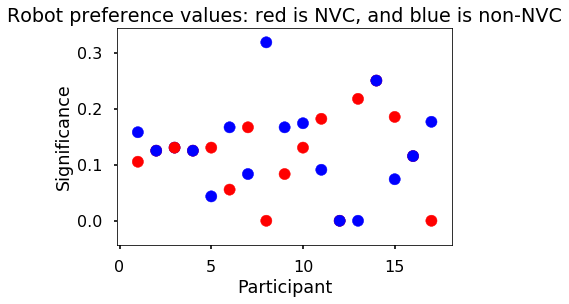

In [18]:
fig, ax = plt.subplots()

colors = {True:'red', False:'blue'}
ax.scatter(eval_data['participant'], eval_data['robot_a_significance'], label=eval_data['NVC_A'], c=eval_data['NVC_A'].apply(lambda x: colors[x]))
ax.scatter(eval_data['participant'], eval_data['robot_b_significance'], label=eval_data['NVC_B'], c=eval_data['NVC_B'].apply(lambda x: colors[x]))
ax.set_xlabel("Participant")
ax.set_ylabel("Significance")

ax.set_title("Robot preference values: red is NVC, and blue is non-NVC")